In [77]:
import pandas  as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest


In [78]:
data = pd.read_csv("HealthCare-DataSet.csv")

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5109 entries, 0 to 5108
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5109 non-null   int64  
 1   gender             5109 non-null   object 
 2   age                5109 non-null   float64
 3   hypertension       5109 non-null   int64  
 4   heart_disease      5109 non-null   int64  
 5   ever_married       5109 non-null   object 
 6   work_type          5109 non-null   object 
 7   Residence_type     5109 non-null   object 
 8   avg_glucose_level  5109 non-null   float64
 9   bmi                4908 non-null   float64
 10  smoking_status     5109 non-null   object 
 11  stroke             5109 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.1+ KB


In [80]:
data.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [81]:
data.tail(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5104,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5105,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5106,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5107,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5108,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [82]:
# Check for typos and inconsistencies in the 'work_type' column
print(data['work_type'].unique())

# Replace any inconsistent values in the 'work_type' column
data['work_type'] = data['work_type'].replace({'children': 'Never_worked'})


['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']


In [83]:
print(data['work_type'].unique())


['Private' 'Self-employed' 'Govt_job' 'Never_worked']


In [84]:
#Convert categorical variable 'gender' to numerical values
data['gender'] = data['gender'].replace({'Male': 0, 'Female': 1})
# Create dummy variables for categorical variable 'smoking_status'


In [85]:
data.head(20)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,1,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,0,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,1,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,1,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,0,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,0,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,1,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,1,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,1,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [86]:
data.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [87]:
mean = data["bmi"].mean()
data.fillna(mean,inplace=True)

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5109 entries, 0 to 5108
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5109 non-null   int64  
 1   gender             5109 non-null   int64  
 2   age                5109 non-null   float64
 3   hypertension       5109 non-null   int64  
 4   heart_disease      5109 non-null   int64  
 5   ever_married       5109 non-null   object 
 6   work_type          5109 non-null   object 
 7   Residence_type     5109 non-null   object 
 8   avg_glucose_level  5109 non-null   float64
 9   bmi                5109 non-null   float64
 10  smoking_status     5109 non-null   object 
 11  stroke             5109 non-null   int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 479.1+ KB


In [89]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5104    False
5105    False
5106    False
5107    False
5108    False
Length: 5109, dtype: bool

In [90]:
data.drop_duplicates()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,67.0,0,1,Yes,Private,Urban,228.69,36.60000,formerly smoked,1
1,51676,1,61.0,0,0,Yes,Self-employed,Rural,202.21,28.89456,never smoked,1
2,31112,0,80.0,0,1,Yes,Private,Rural,105.92,32.50000,never smoked,1
3,60182,1,49.0,0,0,Yes,Private,Urban,171.23,34.40000,smokes,1
4,1665,1,79.0,1,0,Yes,Self-employed,Rural,174.12,24.00000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,18234,1,80.0,1,0,Yes,Private,Urban,83.75,28.89456,never smoked,0
5105,44873,1,81.0,0,0,Yes,Self-employed,Urban,125.20,40.00000,never smoked,0
5106,19723,1,35.0,0,0,Yes,Self-employed,Rural,82.99,30.60000,never smoked,0
5107,37544,0,51.0,0,0,Yes,Private,Rural,166.29,25.60000,formerly smoked,0


{'whiskers': [<matplotlib.lines.Line2D at 0x21e86c36ce0>,
 'caps': [<matplotlib.lines.Line2D at 0x21e86c37220>,
 'boxes': [<matplotlib.lines.Line2D at 0x21e86c36a40>],
 'medians': [<matplotlib.lines.Line2D at 0x21e86c37760>],
 'fliers': [<matplotlib.lines.Line2D at 0x21e86c37a00>],
 'means': []}

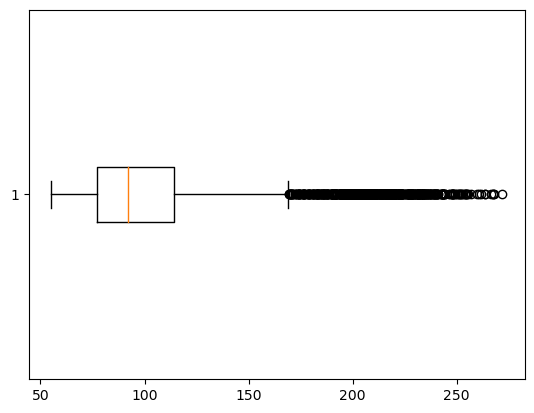

In [91]:
plt.boxplot(data["avg_glucose_level"],vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x21e8704fb80>,
 'caps': [<matplotlib.lines.Line2D at 0x21e86e40100>,
 'boxes': [<matplotlib.lines.Line2D at 0x21e8704f8e0>],
 'medians': [<matplotlib.lines.Line2D at 0x21e86e40640>],
 'fliers': [<matplotlib.lines.Line2D at 0x21e86e408e0>],
 'means': []}

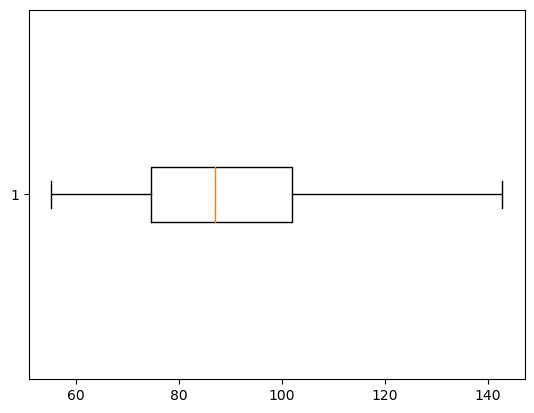

In [95]:
# Identify outliers in the "avg_glucose_level" column using the IQR method
q1 = data["avg_glucose_level"].quantile(0.25)
q3 = data["avg_glucose_level"].quantile(0.75)
iqr = q3 - q1
upper = q3 + 1.5 * iqr
lower = q1 - 1.5 * iqr
outliers = data[(data["avg_glucose_level"] < lower) | (data["avg_glucose_level"] > upper)]
# Remove outliers from the DataFrame
data = data.drop(outliers.index)
plt.boxplot(data["avg_glucose_level"],vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x21e86e951b0>,
 'caps': [<matplotlib.lines.Line2D at 0x21e86e956f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x21e86e94f10>],
 'medians': [<matplotlib.lines.Line2D at 0x21e86e95b10>],
 'fliers': [<matplotlib.lines.Line2D at 0x21e86e95db0>],
 'means': []}

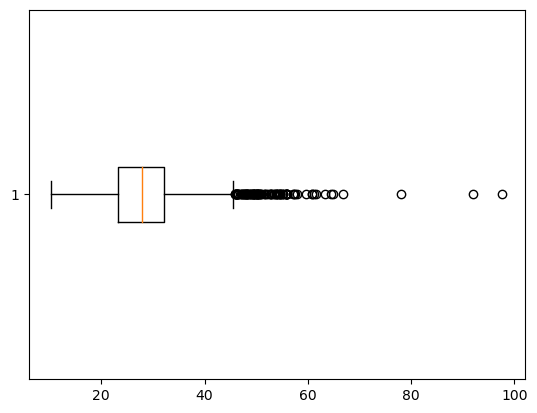

In [96]:
plt.boxplot(data["bmi"],vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x21e880eb940>,
 'caps': [<matplotlib.lines.Line2D at 0x21e880ebe80>,
 'boxes': [<matplotlib.lines.Line2D at 0x21e880eb6a0>],
 'medians': [<matplotlib.lines.Line2D at 0x21e8811c400>],
 'fliers': [<matplotlib.lines.Line2D at 0x21e8811c6a0>],
 'means': []}

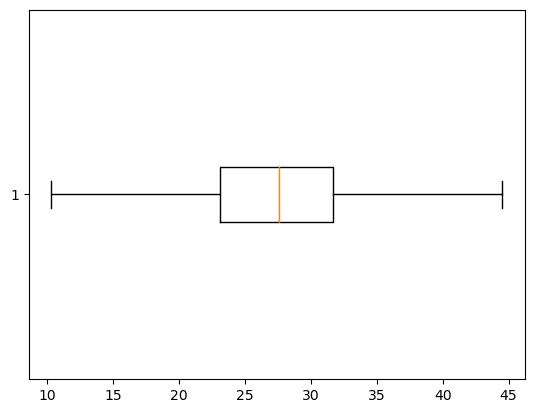

In [100]:
# Identify outliers in the 'bmi' column using the IQR method
q1 = data['bmi'].quantile(0.25)
q3 = data['bmi'].quantile(0.75)
iqr = q3 - q1
upper = q3 + 1.5 * iqr
lower = q1 - 1.5 * iqr
outliers = data[(data['bmi'] < lower) | (data['bmi'] > upper)]
# Remove outliers from the DataFrame
data = data.drop(outliers.index)
plt.boxplot(data["bmi"],vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x21e858e3ee0>,
 'caps': [<matplotlib.lines.Line2D at 0x21e86b9ec20>,
 'boxes': [<matplotlib.lines.Line2D at 0x21e858e2a40>],
 'medians': [<matplotlib.lines.Line2D at 0x21e86b9e4d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x21e85985480>],
 'means': []}

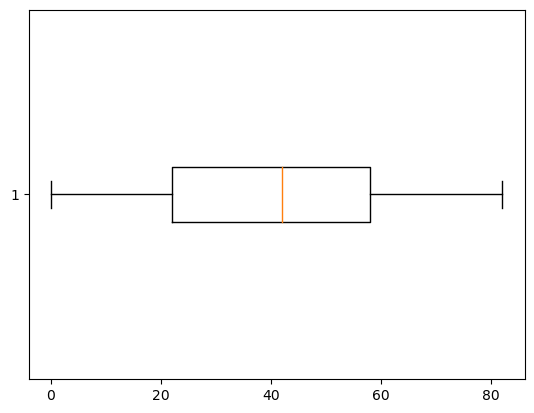

In [101]:
plt.boxplot(data["age"],vert=False)

In [102]:
df=data

In [103]:
type(df)

pandas.core.frame.DataFrame

In [104]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,31112,0,80.0,0,1,Yes,Private,Rural,105.92,32.50000,never smoked,1
6,53882,0,74.0,1,1,Yes,Private,Rural,70.09,27.40000,never smoked,1
7,10434,1,69.0,0,0,No,Private,Urban,94.39,22.80000,never smoked,1
8,27419,1,59.0,0,0,Yes,Private,Rural,76.15,28.89456,Unknown,1
9,60491,1,78.0,0,0,Yes,Private,Urban,58.57,24.20000,Unknown,1


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4199 entries, 2 to 5108
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4199 non-null   int64  
 1   gender             4199 non-null   int64  
 2   age                4199 non-null   float64
 3   hypertension       4199 non-null   int64  
 4   heart_disease      4199 non-null   int64  
 5   ever_married       4199 non-null   object 
 6   work_type          4199 non-null   object 
 7   Residence_type     4199 non-null   object 
 8   avg_glucose_level  4199 non-null   float64
 9   bmi                4199 non-null   float64
 10  smoking_status     4199 non-null   object 
 11  stroke             4199 non-null   int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 426.5+ KB


In [106]:
df.describe()

,id,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4199.000000,4199.000000,4199.000000,4199.000000,4199.000000,4199.000000,4199.000000,4199.000000
mean,36053.071207,0.591808,40.815166,0.073351,0.039295,89.124420,27.660840,0.037152
std,21176.917002,0.491558,22.584918,0.260742,0.194319,19.401583,6.405892,0.189156
min,67.000000,0.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17243.500000,0.000000,22.000000,0.000000,0.000000,74.565000,23.100000,0.000000
50%,35759.000000,1.000000,42.000000,0.000000,0.000000,87.060000,27.600000,0.000000
75%,54300.500000,1.000000,58.000000,0.000000,0.000000,101.985000,31.700000,0.000000
max,72940.000000,1.000000,82.000000,1.000000,1.000000,142.820000,44.500000,1.000000


In [107]:
import statistics
va_age=statistics.variance(df['age'])
va_hypertension=statistics.variance(df['hypertension'])
va_heart_disease=statistics.variance(df['heart_disease'])
va_avg_glucose_level=statistics.variance(df['avg_glucose_level'])
va_bmi=statistics.variance(df['bmi'])
print("var of age " , va_age)
print("var of hypertension ",va_hypertension)
print("var of heart_disease ",va_heart_disease)
print("var of avg_glucose_level ",va_avg_glucose_level)
print("var of bmi ",va_bmi)

var of age  510.0785000142846
var of hypertension  0.06798664942230284
var of heart_disease  0.03775996031633022
var of avg_glucose_level  376.4214327210442
var of bmi  41.03545309441743


# visualization


## Histogram


(array([ 11., 168., 425., 628., 831., 922., 558., 331., 197., 128.]),
 array([10.3 , 13.72, 17.14, 20.56, 23.98, 27.4 , 30.82, 34.24, 37.66,
        41.08, 44.5 ]),
 <BarContainer object of 10 artists>)

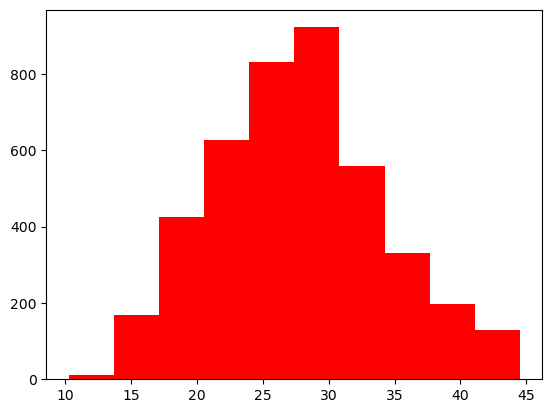

In [108]:
import matplotlib.pyplot as plt
## Histogram
plt.hist(df['bmi'],color='red')

## Density Plot

C:\Users\moham\AppData\Local\Temp\ipykernel_26276\2700717116.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bmi'],
c:\Users\moham\anaconda3\lib\site-packages\seaborn\distributions.py:2511: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


<Axes: xlabel='bmi', ylabel='Density'>

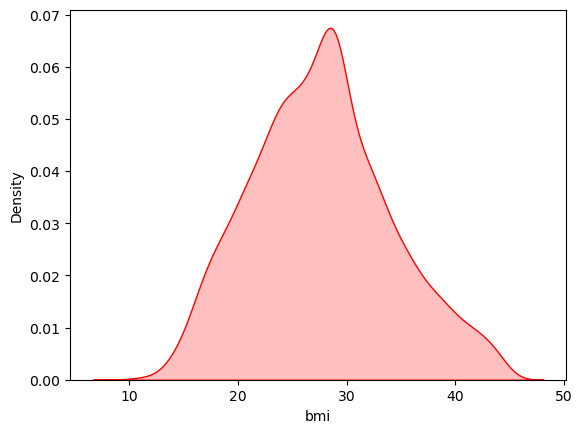

In [109]:
import seaborn as sns
sns.distplot(df['bmi'], 
             kde_kws = {'shade': True},
             color='red',
             hist=False)

## Boxplot

{'whiskers': [<matplotlib.lines.Line2D at 0x21e881b5450>,
 'caps': [<matplotlib.lines.Line2D at 0x21e881b5990>,
 'boxes': [<matplotlib.lines.Line2D at 0x21e8836fbe0>],
 'medians': [<matplotlib.lines.Line2D at 0x21e881b5ed0>],
 'fliers': [<matplotlib.lines.Line2D at 0x21e881b6170>],
 'means': []}

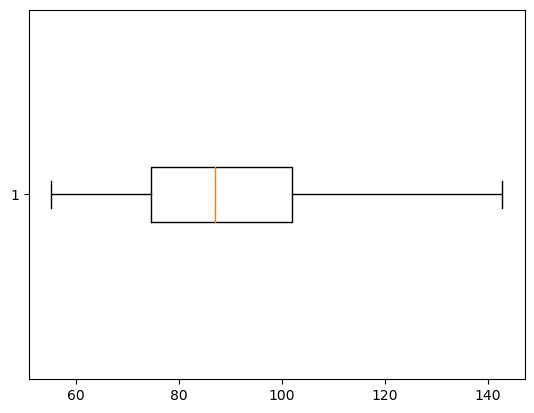

In [110]:
plt.boxplot(df['avg_glucose_level'],vert=False)

## count plot

<Axes: xlabel='work_type', ylabel='count'>

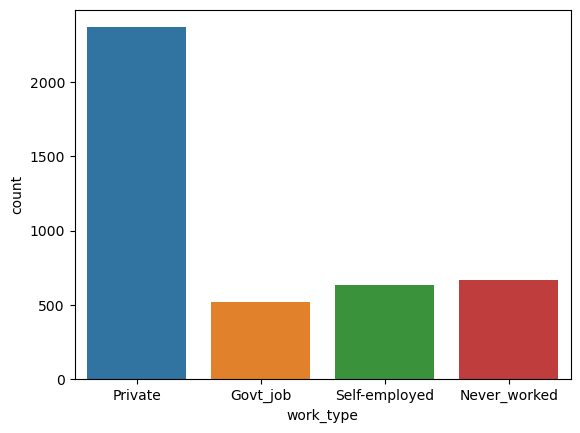

In [111]:
sns.countplot(x = 'work_type',data = df)

<Axes: xlabel='ever_married', ylabel='count'>

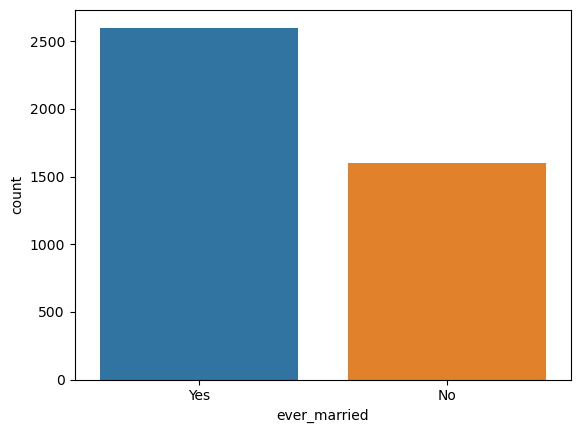

In [123]:
sns.countplot(x=df["ever_married"],data=df)

<Axes: xlabel='hypertension', ylabel='count'>

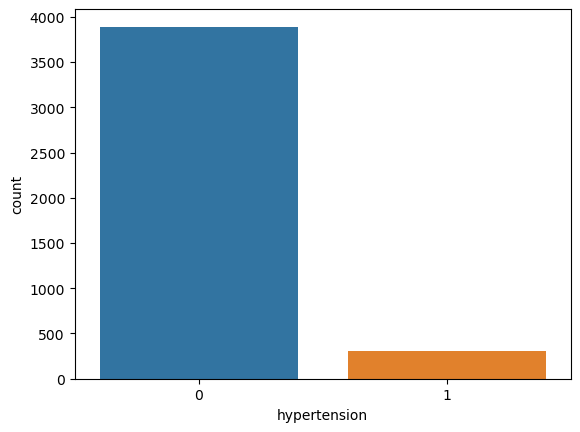

In [124]:
sns.countplot(x=df["hypertension"],data=df)

## Bar chart

<Axes: xlabel='gender', ylabel='Count'>

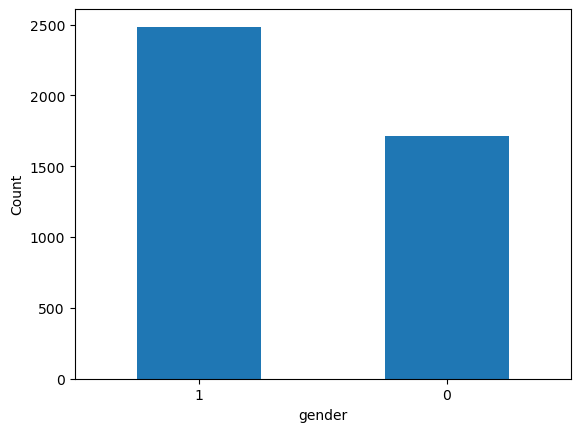

In [114]:
df['gender'].value_counts().plot(kind='bar', xlabel='gender', ylabel='Count', rot=0)

## Pie chart

<Axes: >

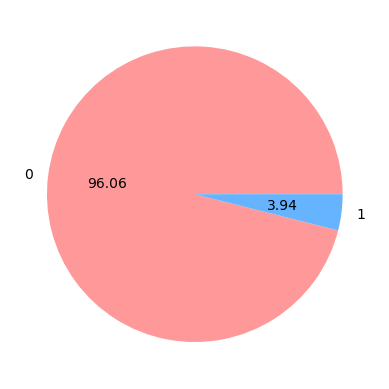

In [76]:
colors = ['#ff9999','#66b3ff']
df.groupby('heart_disease').size().plot(kind='pie', autopct='%.2f',colors=colors)

<Axes: >

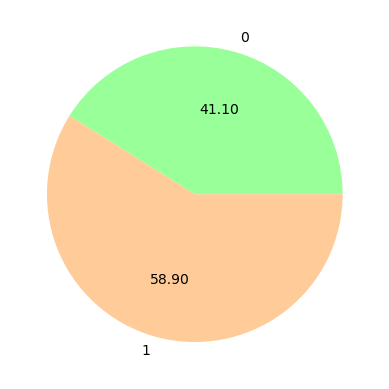

In [37]:
colors = ['#99ff99','#ffcc99']
df.groupby('gender').size().plot(kind='pie', autopct='%.2f',colors=colors)

<Axes: >

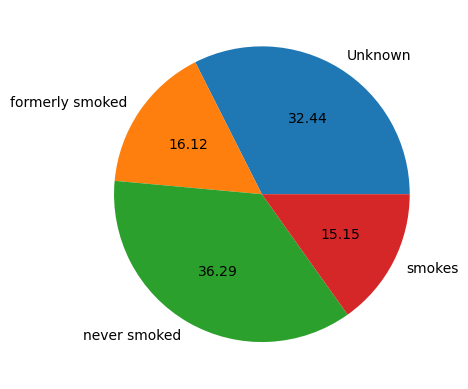

In [38]:
df.groupby('smoking_status').size().plot(kind='pie', autopct='%.2f')

<Axes: >

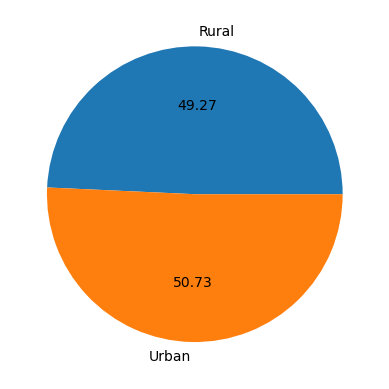

In [121]:
import seaborn as sns
df.groupby('Residence_type').size().plot(kind='pie', autopct='%.2f')

## Stacked column chart

In [115]:
grouped_df = df.groupby(['smoking_status', 'gender'])[['stroke']].count().reset_index()
pivot_df = grouped_df.pivot(index='smoking_status', columns='gender', values='stroke')


In [116]:
#grouped_df.head(5)
pivot_df.head(5)

gender,0,1
smoking_status,,
Unknown,621,742
formerly smoked,284,388
never smoked,535,993
smokes,274,362


In [117]:
Dframe = pd.DataFrame({
   'smoking_status': ['Unknown','formerly smoked','never smoked','smokes'],
   'Male':[708,407,663,337],
   'Female':[836,477,1229,452]
   })

In [118]:
Dframe

,smoking_status,Male,Female
0,Unknown,708,836
1,formerly smoked,407,477
2,never smoked,663,1229
3,smokes,337,452


<Axes: title={'center': 'The number of Smoking Status'}, xlabel='smoking_status'>

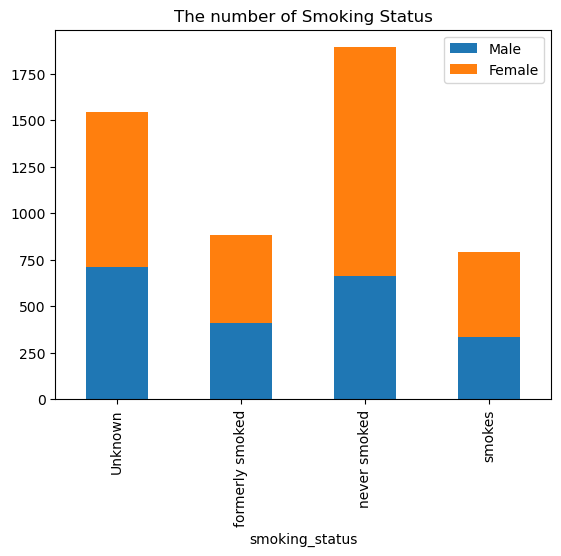

In [119]:
Dframe.plot.bar(x='smoking_status', 
              stacked=True, 
              title='The number of Smoking Status')

In [129]:
unique_values = df['work_type'].unique()
print(unique_values)

[0 1 2 3]


In [130]:
data['work_type'] = data['work_type'].replace({'Private': 0, 'Govt_job': 1, 'Self-employed': 2, 'Never_worked': 3})

In [131]:
unique_values = df['Residence_type'].unique()
print(unique_values)

['Rural' 'Urban']


In [132]:
data['Residence_type'] = data['Residence_type'].replace({'Rural': 0, 'Urban': 1})

In [133]:
unique_values = df['Residence_type'].unique()
print(unique_values)

[0 1]


In [134]:
unique_values = df['smoking_status'].unique()
print(unique_values)

['never smoked' 'Unknown' 'smokes' 'formerly smoked']


In [135]:
data['smoking_status'] = data['smoking_status'].replace({'never smoked': 0, 'smokes': 1, 'formerly smoked': 2, 'Unknown': 3})

In [136]:
unique_values = df['smoking_status'].unique()
print(unique_values)

[0 3 1 2]


In [137]:
unique_values = df['ever_married'].unique()
print(unique_values)

['Yes' 'No']


In [138]:
df['ever_married'] = df['ever_married'].replace({'Yes': 0, 'No': 1})

In [139]:
unique_values = df['gender'].unique()
print(unique_values)

[0 1]


In [140]:
df['gender'] = df['gender'].replace({'Other': 2})

In [141]:
from sklearn.model_selection import train_test_split
y=df['stroke']
x=df.drop('stroke',axis=1)
x
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [143]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9523809523809523


In [145]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion matrix:\n", confusion)


Accuracy: 0.9523809523809523
Confusion matrix:
 [[800   0]
 [ 40   0]]


In [147]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Create an instance of the linear regression model
lr = LinearRegression()

# Fit the model to the training data
lr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lr.predict(X_test)

# Print the mean squared error and R-squared value of the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean squared error:", mse)
print("R-squared:", r2)


Mean squared error: 0.042177587268017916
R-squared: 0.06998420074020484


In [148]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
# Create an instance of the k-NN classifier
k = 3 # choose the number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Print the accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9488095238095238
